Trappist-1 comparing lines with Phoenix models.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy import interpolate
from astropy.convolution import convolve, Box1DKernel,convolve_fft, Gaussian1DKernel

%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [16]:
mpath = '/home/david/work/muscles/trappist-1/sp_models/'
kpath  = '../COS/' 

In [14]:
#Trappist d and r from peacock paper
d = 12.1*u.pc
r = 0.117*const.R_sun

In [15]:
scale = (r/d.to(u.m))**2
scale

<Quantity 4.75273828e-20>

In [17]:
ksp = os.listdir(kpath)

In [22]:
c_ii = [1334.532 ,1335.708]
n_v = [1238.821,1242.804]
c_iv = [1548.202, 1550.774]

In [29]:
mods = os.listdir(mpath)
mods

['TRAPPIST1_2A_fullres.txt',
 'TRAPPIST1_1A_fullres.txt',
 'TRAPPIST1_2B_fullres.txt']

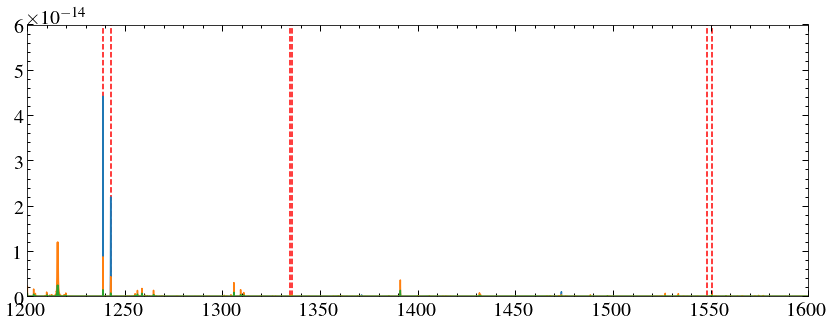

In [38]:
for mod in mods:
    mw, mf = np.loadtxt(mpath+mod, unpack=True, skiprows=1)
    plt.plot(mw, mf*scale)
    plt.xlim(1200, 1600)
    plt.ylim(0.0,0.6e-13)
[plt.axvline(line, ls ='--', c='r', zorder=-10) for line in np.concatenate((c_ii, n_v, c_iv))]

In [43]:
def model_convolve(mw, mf, w, res): #convolves a model with a gaussian
    res_pix = (res * len(w)) / (2.3548*(w[-1]-w[0])) #convert resolution to pixel scale
    mf1 = interpolate.interp1d(mw, mf, bounds_error=False, fill_value=0.)(w) #interpolate model onto measured wavelength
    gauss = Gaussian1DKernel(stddev=res_pix) #set up Gaussian
    new_mf = convolve_fft(mf1, gauss) #convolve model
    return new_mf


In [60]:
mods

['TRAPPIST1_2A_fullres.txt',
 'TRAPPIST1_1A_fullres.txt',
 'TRAPPIST1_2B_fullres.txt']

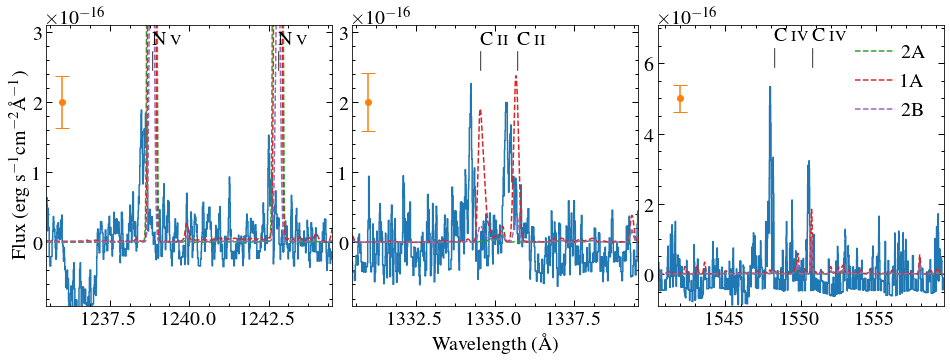

In [66]:
mw2a, mf2a = np.loadtxt(mpath+mods[0], unpack=True, skiprows=1)
mw1a, mf1a = np.loadtxt(mpath+mods[1], unpack=True, skiprows=1)
mw2b, mf2b = np.loadtxt(mpath+mods[2], unpack=True, skiprows=1)
mf2a, mf1a, mf2b = mf2a*scale, mf1a*scale, mf2b*scale
res=0.1

plt.subplots_adjust(top = 0.93, right = 0.99, left = 0.1, bottom = 0.15, wspace = 0.07)

plt.subplot(131)
data = readsav(kpath+ksp[0])
flux = convolve(data['Flux'],Box1DKernel(5))
error =  convolve(data['Err'],Box1DKernel(5))
plt.step(data['Wave'], flux)
plt.ylim(-0.9e-16, 3.1e-16)
plt.xlim(1235.5, 1244.5)
[plt.annotate('N\,{\sc v}\n$|$',(n, 2.5e-16),size=20, color=col) for n in n_v]
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=20)
err = error[(data['Wave']>1235) & (data['Wave']<1245)]
plt.errorbar(1236, 2e-16, yerr= np.median(err), capsize = 7, marker='o')

mf2a_c = model_convolve(mw2a, mf2a, data['Wave'], res)
mf1a_c = model_convolve(mw1a, mf1a, data['Wave'], res)
mf2b_c = model_convolve(mw2b, mf2b, data['Wave'], res)
plt.plot(data['Wave'], mf2a_c, ls='--')
plt.plot(data['Wave'], mf1a_c, ls='--')
plt.plot(data['Wave'], mf2b_c, ls='--')

plt.subplot(132)
plt.step(data['Wave'], flux)
plt.ylim(-0.9e-16, 3.1e-16)
plt.xlim(1330.5, 1339.5)
[plt.annotate('C\,{\sc ii}\n$|$',(c, 2.5e-16),size=20, color =col) for c in c_ii]
plt.xlabel('Wavelength (\AA)', size=20)
err = error[(data['Wave']>1330) & (data['Wave']<1340)]
plt.errorbar(1331, 2e-16, yerr= np.median(err), capsize = 7, marker='o')
plt.plot(data['Wave'], mf2a_c, ls='--')
plt.plot(data['Wave'], mf1a_c, ls='--')
plt.plot(data['Wave'], mf2b_c, ls='--')


data = readsav(kpath+ksp[1])
flux = convolve(data['Flux'],Box1DKernel(5))
error =  convolve(data['Err'],Box1DKernel(5))
plt.subplot(133)
plt.step(data['Wave'], flux)
plt.ylim(-0.9e-16, 7.1e-16)
plt.xlim(1540.5, 1559.5)
[plt.annotate('C\,{\sc iv}\n$|$',(c, 6e-16),size=20, color =col) for c in c_iv]
err = error[(data['Wave']>1540) & (data['Wave']<1560)]
plt.errorbar(1542, 5e-16, yerr= np.median(err), capsize = 7, marker='o')#, ecolor='C1')


mf2a_c = model_convolve(mw2a, mf2a, data['Wave'], res)
mf1a_c = model_convolve(mw1a, mf1a, data['Wave'], res)
mf2b_c = model_convolve(mw2b, mf2b, data['Wave'], res)
plt.plot(data['Wave'], mf2a_c, ls='--', label= '2A')
plt.plot(data['Wave'], mf1a_c, ls='--', label='1A')
plt.plot(data['Wave'], mf2b_c, ls='--', label='2B')
plt.legend()